In [1]:
import numpy as np


In [29]:
rng = np.random.default_rng()

In [30]:
n_samples=10000
X = rng.laplace(size=n_samples) 

# The CDF of Laplace

Consider a standard Laplace distribution with density
$f(x) = 1/2 e^{-|x|}$.

Then, the probability that $x \leq -\theta$, with $\theta > 0$, is
$$CDF(-\theta) = P(x < - \theta) = \int_{-\infty}^{-\theta} \frac{1}{2} e^{-|x|} =  \int_{-\infty}^{-\theta} \frac{1}{2} e^{x} dx$$,
because $x$ is negative in this interval.

The anti-derivative here is $F(x) = \frac{1}{2} e^{x}$. So
$$CDF(-\theta) = [F(x)]^{-\theta}_{-\infty} = F(-\theta) - F(-\infty) =  \frac{1}{2} [e^{-\theta} - e^{-\infty}] = \frac{1}{2}e^{-\theta}$$.

By symmetry, $P(x > \theta) = CDF(-\theta) = \frac{1}{2}e^{-\theta}$. Consequently,
$P(|x| > \theta) = e^{-\theta}$.

Since we only reject $H_0$ when $|x| > \theta$, we can fix the probability $\alpha$ of doing so by solving the equation for $\theta$:
$\alpha = P(|x| > \theta) = e^{-\theta}$ results in $\theta = \ln(2/\alpha)$.



In [48]:
# alpha: probability of false negative P(false | h_0)
# Return TRUE if H_0 is accepted
def laplace_zero_mean_test(x, alpha):
    threshold = np.log (1 / alpha)
    if (np.abs(x) > threshold):
        return True
    else:
        return False
    
#
def laplace_zero_mean_cdf(x, alpha):
    pass


In [49]:
test = []
alpharange = np.arange(0.01,0.5,0.01)
for alpha in alpharange:
    test.append(np.mean([laplace_zero_mean_test(x[t], alpha) for t in range(n_samples)]))

Text(0, 0.5, 'error rate')

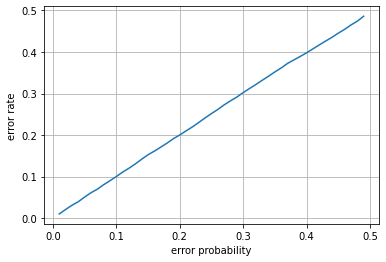

In [50]:
import matplotlib.pyplot as plt
plt.plot(alpharange, test)
plt.grid()
plt.xlabel("error probability")
plt.ylabel("error rate")

(array([ 967., 1009.,  969.,  997.,  993., 1022., 1014., 1048.,  984.,
         997.]),
 array([7.80609646e-05, 1.00064840e-01, 2.00051618e-01, 3.00038397e-01,
        4.00025176e-01, 5.00011954e-01, 5.99998733e-01, 6.99985512e-01,
        7.99972290e-01, 8.99959069e-01, 9.99945848e-01]),
 <BarContainer object of 10 artists>)

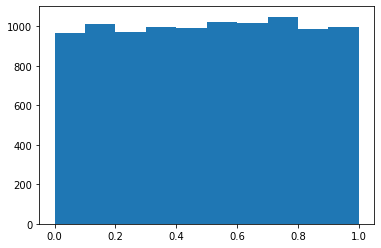

In [68]:
# By definition, if $\theta \sim P$, then the distribution of $p(\theta) = P(x \leq \theta)$ is uniform in $[0,1]$
# Here is a short experiment that shows that.
import scipy
plt.hist(scipy.stats.laplace.cdf(X))

# Constructing a Null Hypothesis Test

In general, if we want to create a decision rule for deciding if some sample $x$ comes from a distribution $P$, and we want the rule to only fail an $\alpha$ portion of the time, it suffices to consider some subset $S_1 \subset X$ of the possible values of $x$ so that we accept $P$ if and only if $x \notin S_1$. We must construct $S_1$ so that $P(S_1) = \alpha$, while the corresponding acceptance set is $S_0 = X - \setminus S_1$ obeys $P(S_0) = 1 - \alpha$.

However, we typically do not want $S_0$ to be arbitrary. We instead want it focus around the high density areas of $P$. For example, for a normal distribution, it should be centered around the mean. This will ensure that the test has high power against the unknown alternative. So, as a rule of thumb, $S_0$ is in the center and $S_1$ in the tails of the distribution.

If we have direct access to the CDF of a distribution on the real numbers, then constructing the test is easy. First of all, the probability that any $x$ is below the observed value $x_t$ is
$$
P(x \leq x_t) = CDF(x_t) = c_t
$$
Now, $x_t$ is a random sample with distribution $P$. Hence, the value of the CDF we observe is also a random variable. Note that by definition of the CDF, the distribution of $c_t$ is uniform. In fact
$$
\Pr(c_t \leq c) = c.
$$

So, to construct a test with a CDF, we merely have to observe $x_t$ and then check if $CDF(x_t) < \alpha$. This will only happen an $\alpha$ fraction of the time if $x_t \sim P$.

You can also use the inverse CDF, of course. Find $x^*$ such that $CDF(x^*) = \alpha$. Then, if $x_t < x^*$,  you can reject $P$.

